In [17]:
import numpy as np
import matplotlib.pyplot as plt

def read_vcf_file(vcf_file_address):

    """
    Assumption: VCF for one individual and all variants are called.  
    
    Reading the vcf file
    input: vcf file
    outputs:
            lines_list: list of string. each string is a line of phased vcf file.
            var_pos_list: genomic position of variants in the vcf file.
    """

    vcf_file = open(vcf_file_address,'r')
    lines_list=[]         
    var_pos_list=[]  
    
    for line in vcf_file:
        line_strip = line.strip()
        lines_list.append(line_strip)
        if line_strip.startswith('#'):
            pass
            #header_lines_list.append(line_strip)
            #sample_names = line_strip.split('\t')[9:11]            # last line of header contains sample name
        else:
            line_parts=line_strip.split('\t')
            chrom = line_parts[0]
            var_pos = int(line_parts[1])                           # genomic position of variants
            var_pos_list.append(var_pos)

    return var_pos_list



In [18]:
folder = "/scratch/smajidi1/hac/"
vcf_file_address = folder+ "hprc_chr22.vcf"

var_pos_list = read_vcf_file(vcf_file_address)


In [19]:
diff_list = []
for i in range(1,len(var_pos_list)):
    diff = var_pos_list[i]-var_pos_list[i-1]
    diff_list.append(diff)
    

In [49]:
print(len(diff_list)+1, np.mean(diff_list), np.max(diff_list), np.min(diff_list))

98943 407.28797679448564 2512818 1


In [51]:

for i in range(1,len(var_pos_list)):
    diff = var_pos_list[i]-var_pos_list[i-1]
    if diff== 2512818:
        print(i, var_pos_list[i],var_pos_list[i-1])


18267 15154408 12641590


Text(0, 0.5, '# variants')

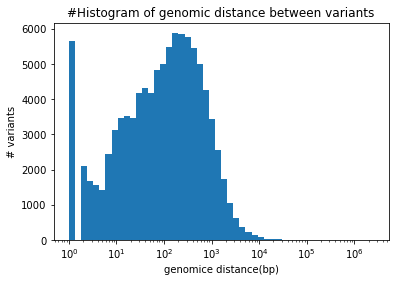

In [47]:
hist, bins = np.histogram(diff_list, bins=50)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(diff_list, bins=logbins)
plt.xscale('log')
plt.title('#Histogram of genomic distance between variants')
plt.xlabel("genomice distance(bp)")
plt.ylabel("# variants")
